# Paris Housing Classification 

## Importing the Libraries 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Reading the Data 

In [106]:
house = pd.read_csv('ParisHousingClass.csv')
house

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic



## Understanding the Data 

In [107]:
house.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [108]:
house.shape

(10000, 18)

In [109]:
house.size

180000

In [110]:
house.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [111]:
house.max()

squareMeters               99999
numberOfRooms                100
hasYard                        1
hasPool                        1
floors                       100
cityCode                   99953
cityPartRange                 10
numPrevOwners                 10
made                        2021
isNewBuilt                     1
hasStormProtector              1
basement                   10000
attic                      10000
garage                      1000
hasStorageRoom                 1
hasGuestRoom                  10
price                1.00068e+07
category                  Luxury
dtype: object

In [112]:
house.min()

squareMeters              89
numberOfRooms              1
hasYard                    0
hasPool                    0
floors                     1
cityCode                   3
cityPartRange              1
numPrevOwners              1
made                    1990
isNewBuilt                 0
hasStormProtector          0
basement                   0
attic                      1
garage                   100
hasStorageRoom             0
hasGuestRoom               0
price                10313.5
category               Basic
dtype: object

In [113]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [114]:
house.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [115]:
house.corr

<bound method DataFrame.corr of       squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0               

In [116]:
house.nunique()

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
category                 2
dtype: int64

In [117]:
# To detect the missing values
house.isnull()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



## Visualization 

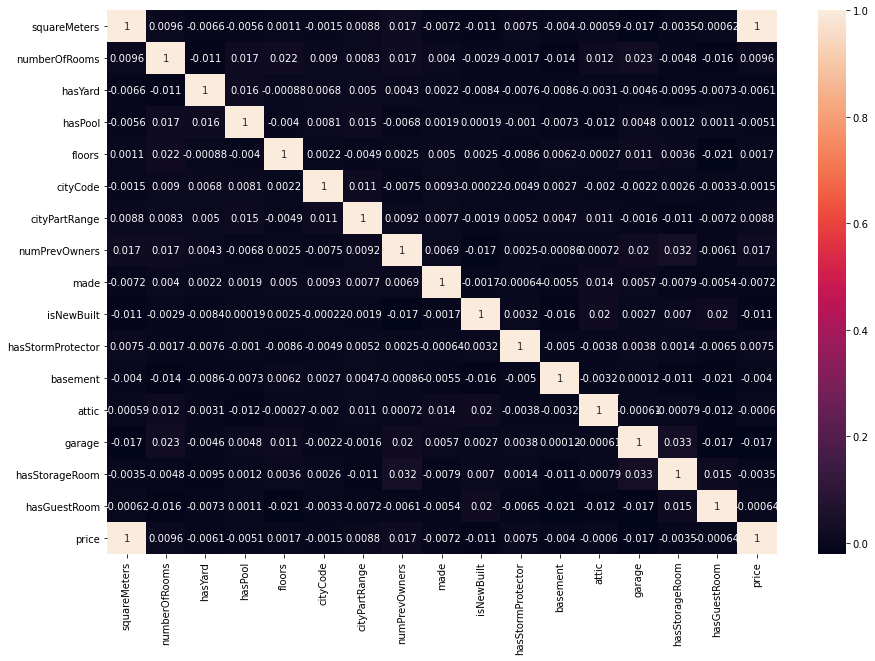

In [118]:
# Relation between the column attributes
plt.figure(figsize=(15,10))
hm = sns.heatmap(house.corr(), annot = True)
plt.show()

<AxesSubplot:>

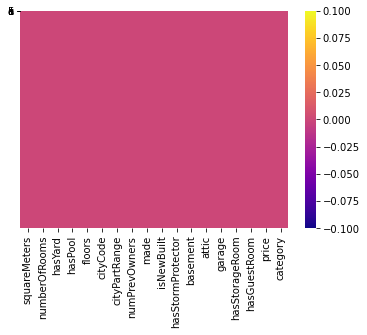

In [119]:
sns.heatmap(house.isnull(), yticklabels = 'False', cmap = 'plasma')

In [120]:
house = house.dropna()

<AxesSubplot:ylabel='category'>

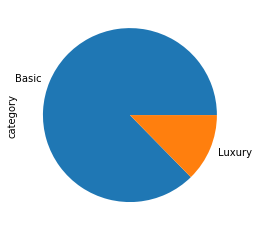

In [121]:
# Using seaborn to plot the category of houses
house.category.value_counts().plot(kind = 'pie')

<AxesSubplot:xlabel='category', ylabel='count'>

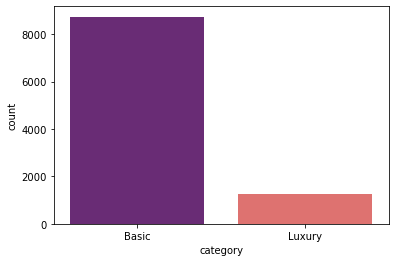

In [122]:
sns.countplot(x = house['category'], label = 'Count', palette = 'magma')

<AxesSubplot:xlabel='squareMeters', ylabel='numberOfRooms'>

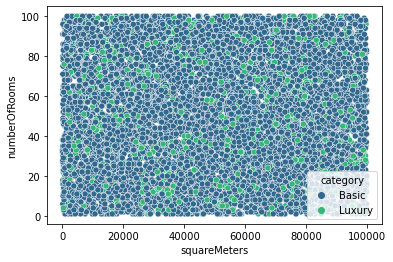

In [123]:
sns.scatterplot(x = house['squareMeters'], y = house['numberOfRooms'], hue = house.category, data = house, palette = 'viridis')

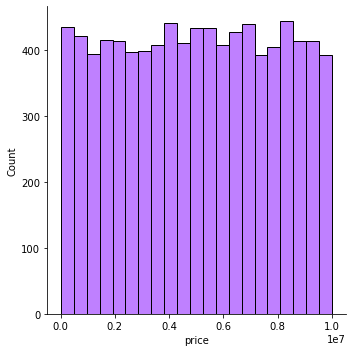

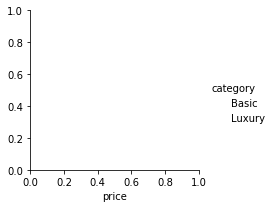

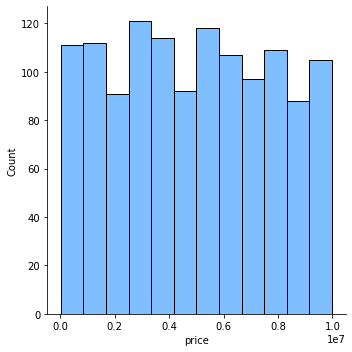

In [124]:
sns.FacetGrid(house, hue='category', palette='cool_r').map(sns.displot, 'price').add_legend()


## Splitting the Data into Dependent and Independent Variables 

In [125]:
x = house.iloc[:, :-1]
y = house.iloc[:, -1]

In [126]:
x.shape

(10000, 17)

In [127]:
x[:5]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [128]:
y[:5]

0     Basic
1    Luxury
2     Basic
3     Basic
4    Luxury
Name: category, dtype: object


## Training and Testing the Data

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


# 1. Naive Bayes 

In [130]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()


### Prediction 

In [131]:
ypred_train = gnb.predict(x_train)
ypred_test = gnb.predict(x_test)


### Confusion Matrix 

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = np.array(confusion_matrix(ypred_test, y_test))
cm1

array([[2608,  392],
       [   0,    0]], dtype=int64)

<AxesSubplot:>

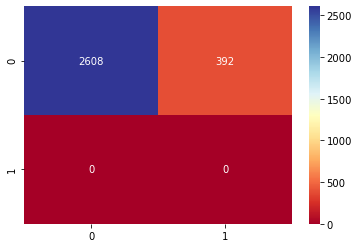

In [133]:
sns.heatmap(pd.DataFrame(cm1), annot = True, cmap = 'RdYlBu', fmt = 'g')


### Accuracy 

In [134]:
print('The Accuracy of Training Data: ', accuracy_score(y_train, ypred_train)*100)
ac1 = accuracy_score(y_test, ypred_test)*100
print('The Accuracy of Testing Data: ', ac1)

The Accuracy of Training Data:  87.52857142857144
The Accuracy of Testing Data:  86.93333333333332



# 2. Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)


### Prediction 

In [136]:
ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)


### Confusion Matrix

In [137]:
cm2 = np.array(confusion_matrix(ypred_test, y_test))
cm2

array([[2261,    0],
       [ 347,  392]], dtype=int64)

<AxesSubplot:>

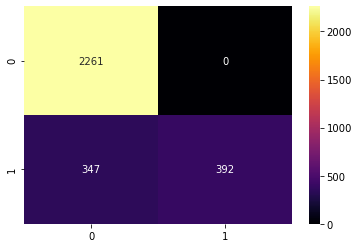

In [138]:
sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = 'inferno', fmt = 'g')


### Accuracy 

In [139]:
print('The Accuracy of Training Data: ', accuracy_score(y_train, ypred_train)*100)
ac2 = accuracy_score(y_test, ypred_test)*100
print('The Accuracy of Testing Data: ', ac2)

The Accuracy of Training Data:  87.6
The Accuracy of Testing Data:  88.43333333333334



# 3. Random Forest 

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 3)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)


### Prediction 

In [150]:
ypred_train = rf.predict(x_train)
ypred_test = rf.predict(x_test)


### Confusion Matrix 

In [151]:
cm3 = np.array(confusion_matrix(ypred_test, y_test))
cm3

array([[2608,  392],
       [   0,    0]], dtype=int64)

<AxesSubplot:>

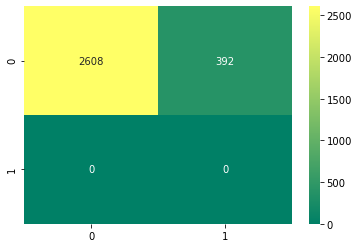

In [152]:
sns.heatmap(pd.DataFrame(cm3), annot = True, cmap = 'summer', fmt = 'g')


### Accuracy 

In [153]:
print('The Accuracy of Training Data: ', accuracy_score(y_train, ypred_train)*100)
ac3 = accuracy_score(y_test, ypred_test)*100
print('The Accuracy of Testing Data: ', ac3)

The Accuracy of Training Data:  87.52857142857144
The Accuracy of Testing Data:  86.93333333333332



# 4. Support Vector Machine 

In [154]:
from sklearn.svm import SVC
svc = SVC(random_state = 7)
svc.fit(x_train, y_train)

SVC(random_state=7)


### Prediction 

In [155]:
ypred_train = svc.predict(x_train)
ypred_test = svc.predict(x_test)


### Confusion Matrix 

In [156]:
cm4 = np.array(confusion_matrix(ypred_test, y_test))
cm4

array([[2608,  392],
       [   0,    0]], dtype=int64)

<AxesSubplot:>

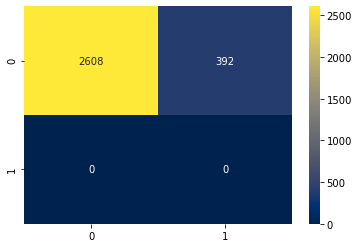

In [157]:
sns.heatmap(pd.DataFrame(cm4), annot = True, cmap = 'cividis', fmt = 'g')


### Accuracy 

In [158]:
print('The Accuracy of Training Data: ', accuracy_score(y_train, ypred_train)*100)
ac4 = accuracy_score(y_test, ypred_test)*100
print('The Accuracy of Testing Data: ', ac4)

The Accuracy of Training Data:  87.52857142857144
The Accuracy of Testing Data:  86.93333333333332



# 5. K Nearest Neighbor 

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)


### Prediction 

In [160]:
ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)


### Confusion Matrix 

In [161]:
cm5 = np.array(confusion_matrix(ypred_test, y_test))
cm5

array([[2596,  392],
       [  12,    0]], dtype=int64)

<AxesSubplot:>

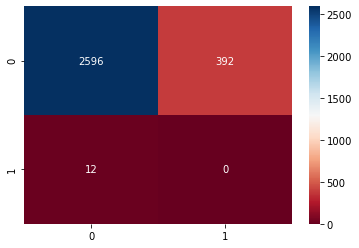

In [162]:
sns.heatmap(pd.DataFrame(cm5), annot = True, cmap = 'RdBu', fmt = 'g')


### Accuracy  

In [163]:
print('The Accuracy of Training Data: ', accuracy_score(y_train, ypred_train)*100)
ac5 = accuracy_score(y_test, ypred_test)*100
print('The Accuracy of Testing Data: ', ac5)

The Accuracy of Training Data:  87.61428571428571
The Accuracy of Testing Data:  86.53333333333333




# Comparison of Accuracy between Different Models

In [164]:
accuracy = {ac1:'Naive Bayes', ac2:'Decision Tree', ac3:'Random Forest', ac4:'SVM', ac5:'KNN' }

<AxesSubplot:>

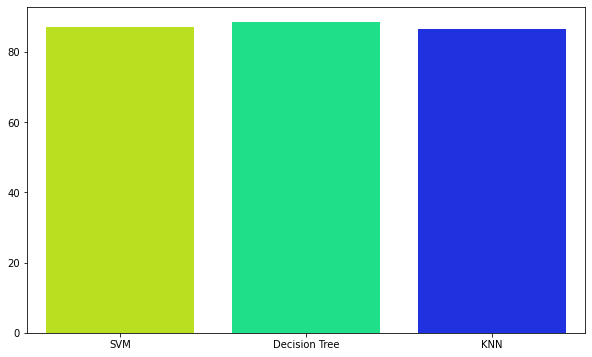

In [165]:
plt.figure(figsize=(10,6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x = model_accuracies, y = model_names, palette = 'gist_rainbow')

### Therefore, the model with the Highest Accuracy Score is ``Decision Tree`` with an accuracy of 88.43